In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.style.use('fivethirtyeight')

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Imputer, StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [2]:
col_names = ['time_pregnant', 'plasma_glucose_concentration', 'diastolic_blood_pressure',
            'triceps_thickness', 'serum_insulin', 'bmi', 'pedigree_function', 'age', 'onset_diabetes']
pima = pd.read_csv('data/pima.data', header=None, names=col_names)

In [3]:
pima.head()

,time_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
time_pregnant                   768 non-null int64
plasma_glucose_concentration    768 non-null int64
diastolic_blood_pressure        768 non-null int64
triceps_thickness               768 non-null int64
serum_insulin                   768 non-null int64
bmi                             768 non-null float64
pedigree_function               768 non-null float64
age                             768 non-null int64
onset_diabetes                  768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
pima.describe()

,time_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
'''
data level
----------
time_pregnant : ratio
plasma_glucose_concentration : ratio
diastolic_blood_pressure : ratio
triceps_thickness: ratio
serum_insulin : ratio
bmi : ratio
pedigree_function : ratio
age : ratio
onset_diabetes : nominal
'''

'\ndata level\n----------\ntime_pregnant : ratio\nplasma_glucose_concentration : ratio\ndiastolic_blood_pressure : ratio\ntriceps_thickness: ratio\nserum_insulin : ratio\nbmi : ratio\npedigree_function : ratio\nage : ratio\nonset_diabetes : nominal\n'

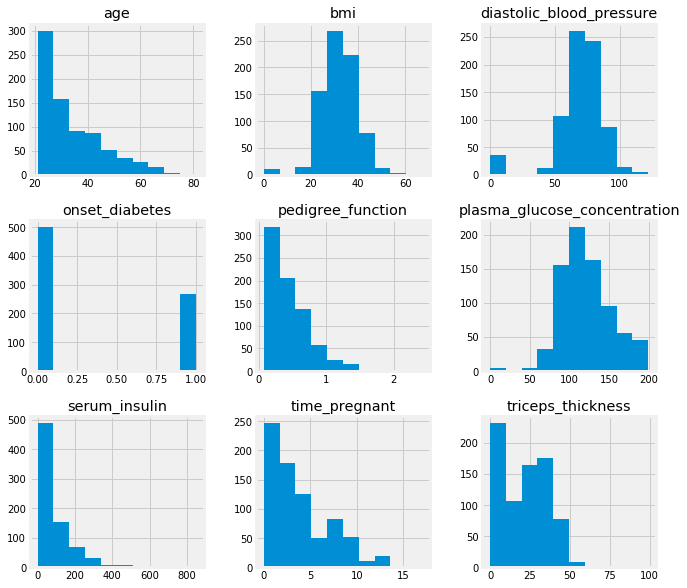

In [7]:
_ = pima.hist(figsize=(10, 10))

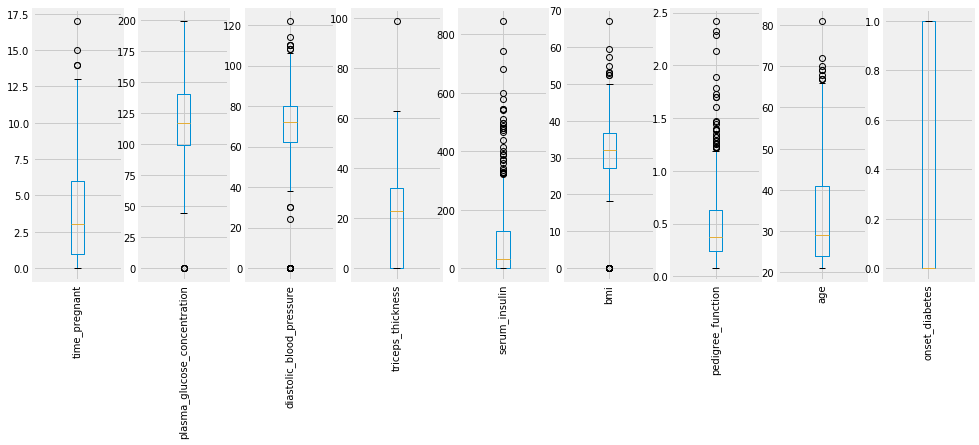

In [8]:
_ = pima.plot(kind='box', subplots=True, figsize=(15, 5), rot=90)

In [9]:
(pima == 0).sum()

time_pregnant                   111
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                  500
dtype: int64

In [10]:
# convert 0 values in columns to None: reflect missing value
for col in pima.columns[1:6]:
    pima[col] = pima[col].map(lambda x: x if x!=0 else None)

In [11]:
pima.isnull().sum()

time_pregnant                     0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [12]:
pima.describe()

,time_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
by_onset = pima.groupby('onset_diabetes')

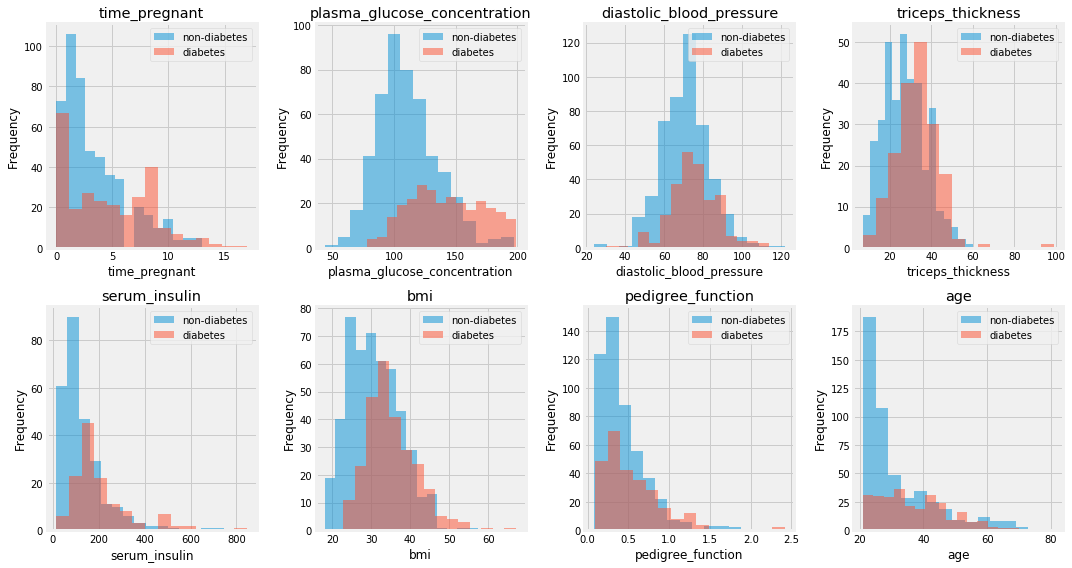

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
for axi, col in zip(ax.flat, pima.columns[:-1]): 
    
    axi.hist(by_onset.get_group(0)[col].dropna(), bins=15, alpha=.5, label='non-diabetes')
    axi.hist(by_onset.get_group(1)[col].dropna(), bins=15, alpha=.5, label='diabetes')
    axi.legend(loc='upper right')
    axi.set_xlabel(col)
    axi.set_ylabel('Frequency')
    axi.set_title(col)
    
fig.tight_layout()

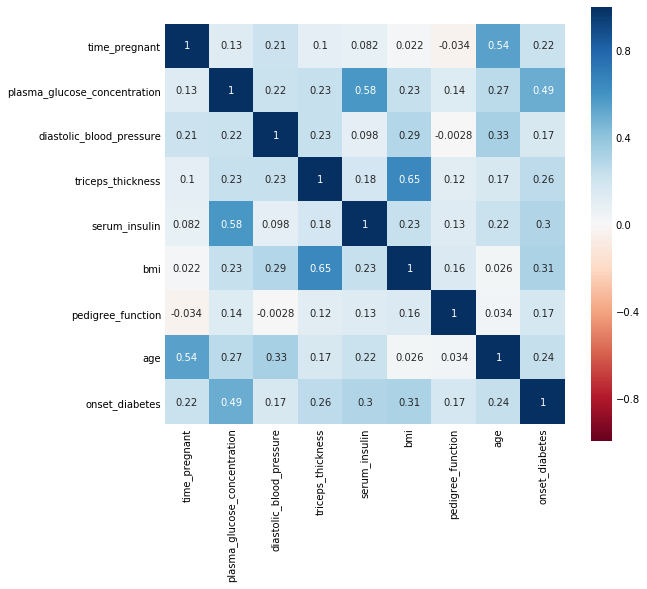

In [15]:
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(pima.corr(), square=True, annot=True, 
            ax=ax, vmax=1, vmin=-1, cmap=plt.cm.RdBu)

In [16]:
pima.head()

,time_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


#### Removing NaN rows

In [17]:
# try drop all rows with NaN value
pima_dropped = pima.dropna()

In [18]:
pima_dropped.shape, pima.shape

((392, 9), (768, 9))

In [19]:
# % remaining
pima_dropped.shape[0]/pima.shape[0] * 100

51.041666666666664

In [20]:
# post-drop: mean
mean_post = pima_dropped.mean()
mean_post

time_pregnant                     3.301020
plasma_glucose_concentration    122.627551
diastolic_blood_pressure         70.663265
triceps_thickness                29.145408
serum_insulin                   156.056122
bmi                              33.086224
pedigree_function                 0.523046
age                              30.864796
onset_diabetes                    0.331633
dtype: float64

In [21]:
# pre-drop : mean
mean_pre = pima.mean()
mean_pre

time_pregnant                     3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [22]:
# % change in means
mean_pct_chg = (mean_post - mean_pre) / mean_pre * 100
mean_pct_chg

time_pregnant                  -14.148877
plasma_glucose_concentration     0.773123
diastolic_blood_pressure        -2.405793
triceps_thickness               -0.027480
serum_insulin                    0.326522
bmi                              1.937184
pedigree_function               10.843862
age                             -7.148093
onset_diabetes                  -4.964971
dtype: float64

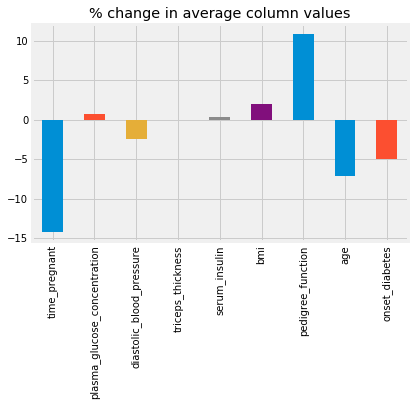

In [23]:
mean_pct_chg.plot.bar(title='% change in average column values')

In [24]:
# perform K-neighbor classification on pima_dropped

X_dropped = pima_dropped.drop('onset_diabetes', axis=1)
y_dropped = pima_dropped['onset_diabetes'].values


knn_params = {'n_neighbors': [1,2,3,4,5,6,7]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params)

knn_grid.fit(X_dropped, y_dropped)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
# score if drop all nan rows (remain 392 out of 768 rows)
knn_grid.best_score_, knn_grid.best_params_

(0.7448979591836735, {'n_neighbors': 7})

#### Imputing NaN rows

In [26]:
imputer = Imputer(strategy='mean')
pima_impute = imputer.fit_transform(pima)

In [27]:
pima_impute = pd.DataFrame(pima_impute, columns=pima.columns)

In [28]:
pima_impute.head()

,time_pregnant,plasma_glucose_concentration,diastolic_blood_pressure,triceps_thickness,serum_insulin,bmi,pedigree_function,age,onset_diabetes
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0


In [29]:
pima_impute.isnull().sum()

time_pregnant                   0
plasma_glucose_concentration    0
diastolic_blood_pressure        0
triceps_thickness               0
serum_insulin                   0
bmi                             0
pedigree_function               0
age                             0
onset_diabetes                  0
dtype: int64

In [30]:
# impute nan with 0
pima_zero = pima.fillna(value=0)

X_zero = pima_zero.drop('onset_diabetes', axis=1)
y_zero = pima_zero['onset_diabetes'].values

knn_params = {'n_neighbors': [1,2,3,4,5,6,7]}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params)
knn_grid.fit(X_zero, y_zero)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [31]:
# score if not convert 0 to nan (original data)
knn_grid.best_score_, knn_grid.best_params_

(0.73046875, {'n_neighbors': 6})

#### Impute missing values using Pipeline

In [38]:
X = pima.drop('onset_diabetes', axis=1)
y = pima['onset_diabetes'].values

X.shape, y.shape

((768, 8), (768,))

In [41]:
pipeline = Pipeline([
    ('imputer', Imputer()),
    ('classifier', KNeighborsClassifier()),
])

pipe_params = {'classifier__n_neighbors': [1,2,3,4,5,6,7],
               'imputer__strategy': ['mean', 'median']}

knn_grid = GridSearchCV(pipeline, pipe_params)

knn_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7], 'imputer__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
knn_grid.best_score_, knn_grid.best_params_

(0.7356770833333334,
 {'classifier__n_neighbors': 6, 'imputer__strategy': 'median'})

#### Standardization and normalization

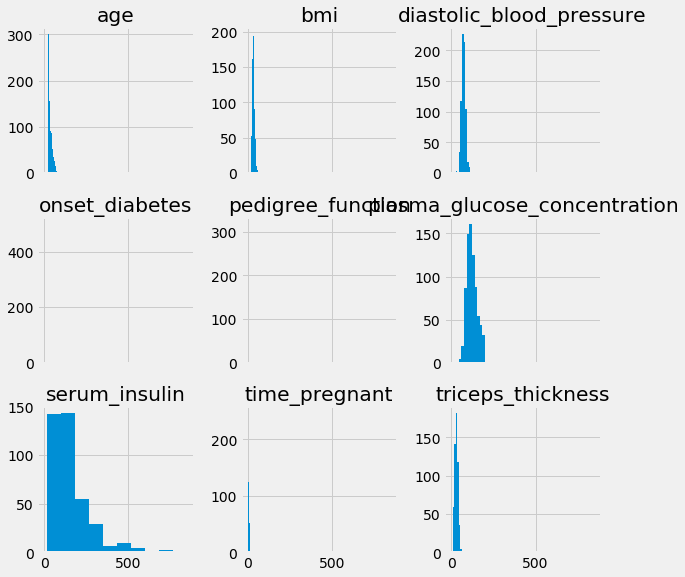

In [51]:
# each columns have different scales
_ = pima.hist(figsize=(9, 9), sharex=True)

In [52]:
pima.mean()

time_pregnant                     3.845052
plasma_glucose_concentration    121.686763
diastolic_blood_pressure         72.405184
triceps_thickness                29.153420
serum_insulin                   155.548223
bmi                              32.457464
pedigree_function                 0.471876
age                              33.240885
onset_diabetes                    0.348958
dtype: float64

In [53]:
pima.std()

time_pregnant                     3.369578
plasma_glucose_concentration     30.535641
diastolic_blood_pressure         12.382158
triceps_thickness                10.476982
serum_insulin                   118.775855
bmi                               6.924988
pedigree_function                 0.331329
age                              11.760232
onset_diabetes                    0.476951
dtype: float64

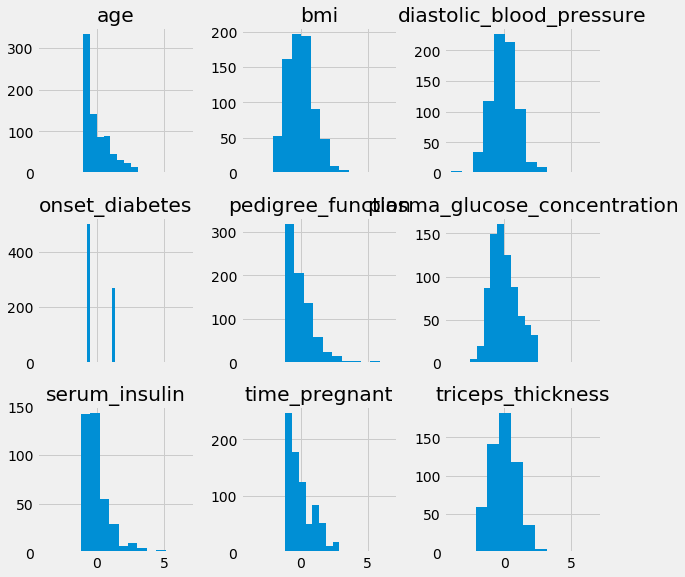

In [55]:
_ = ((pima-pima.mean())/pima.std()).hist(figsize=(9, 9), sharex=True)

In [57]:
pima.isnull().sum()

time_pregnant                     0
plasma_glucose_concentration      5
diastolic_blood_pressure         35
triceps_thickness               227
serum_insulin                   374
bmi                              11
pedigree_function                 0
age                               0
onset_diabetes                    0
dtype: int64

In [58]:
# Pipeline: impute -> standardize -> knn

pipeline = Pipeline([
    ('imputer', Imputer()),
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier()),
])

In [65]:
params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': [1,2,3,4,5,6,7],
}

In [66]:
pipe_grid = GridSearchCV(pipeline, params)
pipe_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'imputer__strategy': ['mean', 'median'], 'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
pipe_grid.best_score_, pipe_grid.best_params_

(0.7434895833333334,
 {'classifier__n_neighbors': 7, 'imputer__strategy': 'median'})

#### min-max scaling method

In [73]:
pima_stats = pima.describe().T

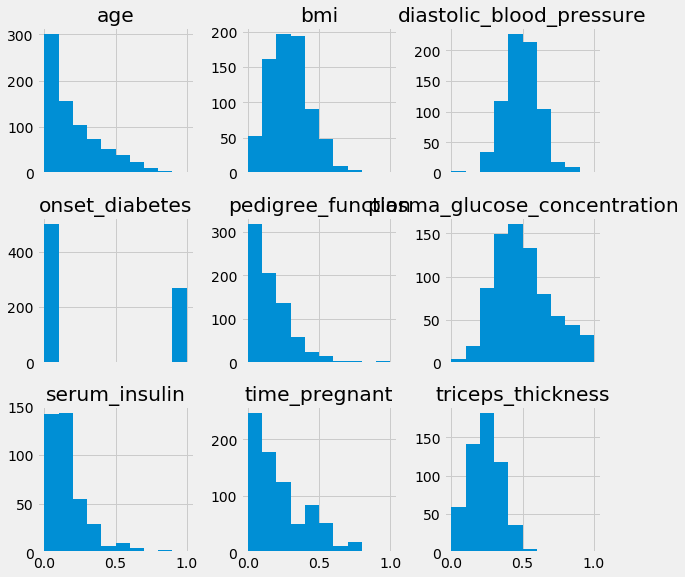

In [75]:
# scaling to range(0, 1) -> preserve exactly the same distribution shapes
_ = ((pima - pima_stats['min'])/(pima_stats['max']-pima_stats['min'])).hist(figsize=(9, 9), sharex=True)

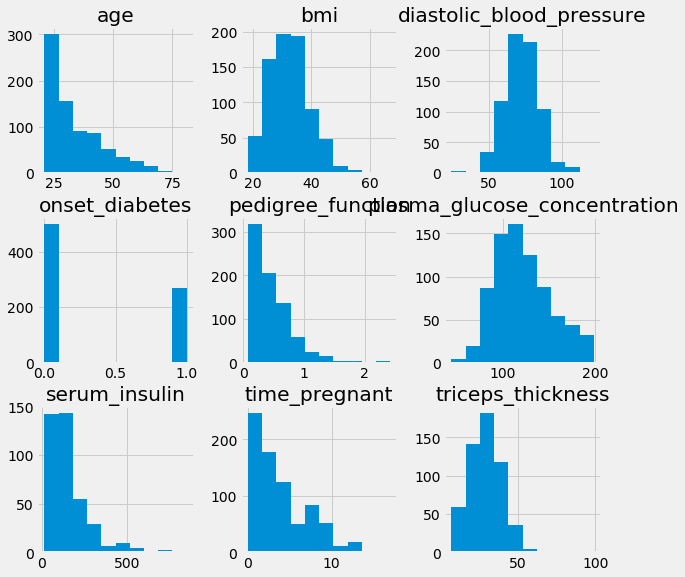

In [77]:
# before min-max scaling
_ = pima.hist(figsize=(9, 9))

In [78]:
# pipeline: impute -> scale -> knn
pipeline = Pipeline([
    ('imputer', Imputer()),
    ('scaler', MinMaxScaler()),
    ('classifier', KNeighborsClassifier()),
])

params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': [1,2,3,4,5,6,7],
}

pipe_grid = GridSearchCV(pipeline, params)
pipe_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'imputer__strategy': ['mean', 'median'], 'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [79]:
pipe_grid.best_score_, pipe_grid.best_params_

(0.74609375, {'classifier__n_neighbors': 4, 'imputer__strategy': 'mean'})

In [100]:
# logistic_regression clf
pipeline = Pipeline([
    ('imputer', Imputer()),
    ('scaler', MinMaxScaler()),
    ('classifier', LogisticRegression())
])

params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__C': [.01, .1, 1, 10, 20],
}

pipe_grid = GridSearchCV(pipeline, params)
pipe_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'classifier__C': [0.01, 0.1, 1, 10, 20], 'imputer__strategy': ['mean', 'median']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [101]:
pipe_grid.best_score_, pipe_grid.best_params_

(0.7721354166666666, {'classifier__C': 10, 'imputer__strategy': 'mean'})

#### row normalization method

In [83]:
# mean l2 norm in the dataset before row normalization
np.sqrt((pima_dropped ** 2).sum(axis=1)).mean()

227.0206605273626

In [84]:
normalizer = Normalizer(norm='l2')

In [86]:
# after normalization -> mean norm = 1.0
np.sqrt((normalizer.fit_transform(pima_dropped.iloc[:, :-1]) ** 2).sum(axis=1)).mean()

1.0

In [93]:
# pipeline : imputer -> normalization -> knn

pipeline = Pipeline([
    ('imputer', Imputer()),
    ('scaler', Normalizer()),
    ('classifier', KNeighborsClassifier()),
])

params = {
    'imputer__strategy': ['mean', 'median'],
    'classifier__n_neighbors': [1,2,3,4,5,6,7],
}

pipe_grid = GridSearchCV(pipeline, params)
pipe_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('scaler', Normalizer(copy=True, norm='l2')), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'imputer__strategy': ['mean', 'median'], 'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [92]:
pipe_grid.best_score_, pipe_grid.best_params_

(0.6822916666666666,
 {'classifier__n_neighbors': 6, 'imputer__strategy': 'mean'})